# Gradient Boosting - XGBoost

In [3]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 1.8 MB/s eta 0:00:41
    --------------------------------------- 1.0/72.0 MB 1.8 MB/s eta 0:00:40
    --------------------------------------- 1.6/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 2.1/72.0 MB 1.9 MB/s eta 0:00:38
   - -------------------------------------- 2.4/72.0 MB 1.9 MB/s eta 0:00:38
   - -------------------------------------- 2.6/72.0 MB 1.8 MB/s eta 0:00:39
   - -------------------------------------- 2.9/72.0 MB 1.7 MB/s eta 0:00:42
   - -------------------------------------- 3.1/72.0 MB 1.6 MB/s eta 0:00:42
   - -------------------------------------- 3.4/72.0 MB 1.6 MB/s eta 0:00:42
   -- ---------------------


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## XGBmodel

In [5]:
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric='logloss'
)

model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


## Prediction and Evaluation

In [6]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Model Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        64
           1       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## Confusion Matrix

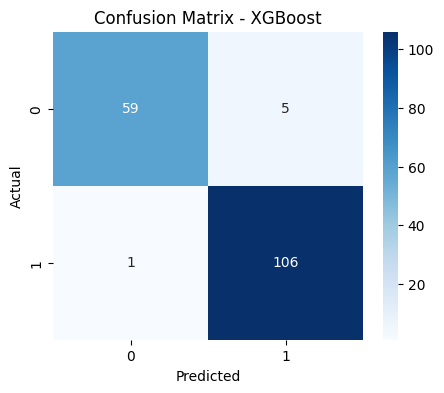

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

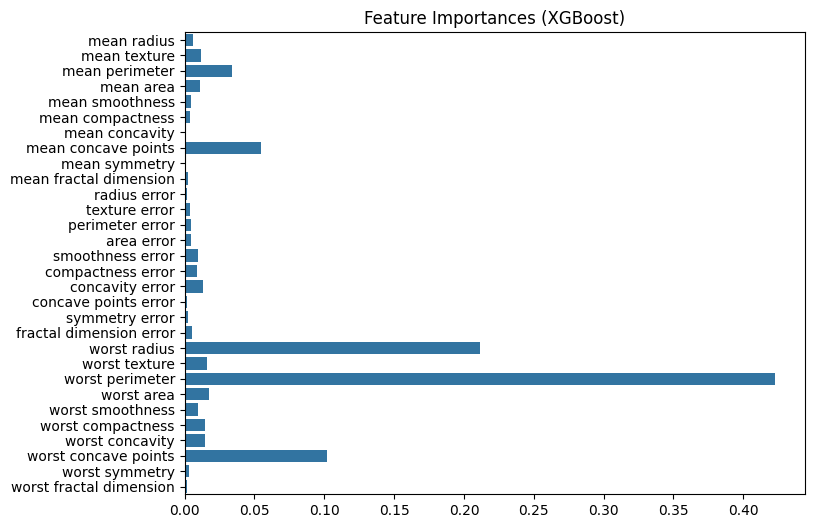

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x=model.feature_importances_, y=data.feature_names)
plt.title('Feature Importances (XGBoost)')
plt.show()